In [ ]:
import json
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def separate_json_by_test_type(input_file_path, output_file_prefix):
    with open(input_file_path, 'r') as file:
        data = json.load(file)

    random_ngram_experiments = []
    review_ngram_experiments = []

    for item in data:
        test_type = item.get("test_type")
        if test_type == "randomNgramExperiment":
            random_ngram_experiments.append(item)
        elif test_type == "reviewNgramExperiment":
            review_ngram_experiments.append(item)

    random_output_file_path = f"{output_file_prefix}_test.json"
    review_output_file_path = f"{output_file_prefix}_review.json"

    with open(random_output_file_path, 'w') as random_file:
        json.dump(random_ngram_experiments, random_file, indent=2)

    with open(review_output_file_path, 'w') as review_file:
        json.dump(review_ngram_experiments, review_file, indent=2)

    print(f"Separated data saved in {random_output_file_path} and {review_output_file_path}")

In [ ]:
input_file_path = "/content/ngram-experiment_export.json"
output_file_prefix = "separated_data"
separate_json_by_test_type(input_file_path, output_file_prefix)

Separated data saved in separated_data_test.json and separated_data_review.json


In [ ]:
def count_correct_ngrams(input_file_path):
    with open(input_file_path, 'r') as file:
        data = json.load(file)

    random_bigram_counts = {}
    random_trigram_counts = {}
    review_bigram_counts = {}
    review_trigram_counts = {}

    for item in data:
        test_id = item["test_id"]
        test_type = item["test_type"]

        if test_type == "randomNgramExperiment":
            bigram_counts = random_bigram_counts.setdefault(test_id, {})
            trigram_counts = random_trigram_counts.setdefault(test_id, {})
        elif test_type == "reviewNgramExperiment":
            bigram_counts = review_bigram_counts.setdefault(test_id, {})
            trigram_counts = review_trigram_counts.setdefault(test_id, {})

        for answer in item["answers"]:
            word_type = answer["word_type"]
            answered_word = answer["answered_word"]
            correct_word = answer["correct_word"]

            if word_type == "bigram":
                if answered_word == correct_word:
                    bigram_counts[answered_word] = bigram_counts.get(answered_word, 0) + 1
            elif word_type == "trigram":
                if answered_word == correct_word:
                    trigram_counts[answered_word] = trigram_counts.get(answered_word, 0) + 1

    return random_bigram_counts, random_trigram_counts, review_bigram_counts, review_trigram_counts


input_file_path = "/content/ngram-experiment_export.json"
(random_bigram_counts, random_trigram_counts, review_bigram_counts, review_trigram_counts) = count_correct_ngrams(input_file_path)

print("Correct Bigram Counts for randomNgramExperiment:")
for test_id, counts in random_bigram_counts.items():
    total_correct_bigrams = sum(counts.values())
    print(f"Test ID: {test_id}, Correct Bigram Count: {total_correct_bigrams}")

print("\nCorrect Trigram Counts for randomNgramExperiment:")
for test_id, counts in random_trigram_counts.items():
    total_correct_trigrams = sum(counts.values())
    print(f"Test ID: {test_id}, Correct Trigram Count: {total_correct_trigrams}")

print("\nCorrect Bigram Counts for reviewNgramExperiment:")
for test_id, counts in review_bigram_counts.items():
    total_correct_bigrams = sum(counts.values())
    print(f"Test ID: {test_id}, Correct Bigram Count: {total_correct_bigrams}")

print("\nCorrect Trigram Counts for reviewNgramExperiment:")
for test_id, counts in review_trigram_counts.items():
    total_correct_trigrams = sum(counts.values())
    print(f"Test ID: {test_id}, Correct Trigram Count: {total_correct_trigrams}")


Correct Bigram Counts for randomNgramExperiment:
Test ID: 51b241cf-9133-4e6f-91d2-06bea5e557fc, Correct Bigram Count: 0
Test ID: cda942d1-04c5-46d2-8b18-2e53e3577178, Correct Bigram Count: 0
Test ID: e286a945-39e8-46d8-add1-116e338e054b, Correct Bigram Count: 0
Test ID: 9cca1ceb-1541-4f3e-9d0a-fb205bf1ae6c, Correct Bigram Count: 0
Test ID: 1a87c27b-37f2-439d-8726-1f246293027a, Correct Bigram Count: 2
Test ID: 02214f71-73b6-4050-80f0-d97ecb1c0f31, Correct Bigram Count: 0
Test ID: 99f39550-68a3-4a89-a699-d760c2003068, Correct Bigram Count: 1
Test ID: f256e41d-a9b6-4240-9e81-c16643be3573, Correct Bigram Count: 0
Test ID: dcc68251-91cd-42fb-bd70-1017d1f29293, Correct Bigram Count: 0
Test ID: f692787d-7ae4-4811-80be-3487fd430c23, Correct Bigram Count: 1
Test ID: ed3ed4d0-eb90-4e86-a0e3-849cab8f135d, Correct Bigram Count: 0
Test ID: 88f1344f-c2e2-4e45-a54c-900ce2bf9f42, Correct Bigram Count: 0
Test ID: c80389cc-7a77-4c85-9bfe-0dc1db435cbc, Correct Bigram Count: 1
Test ID: 456582ef-7e00-4736-

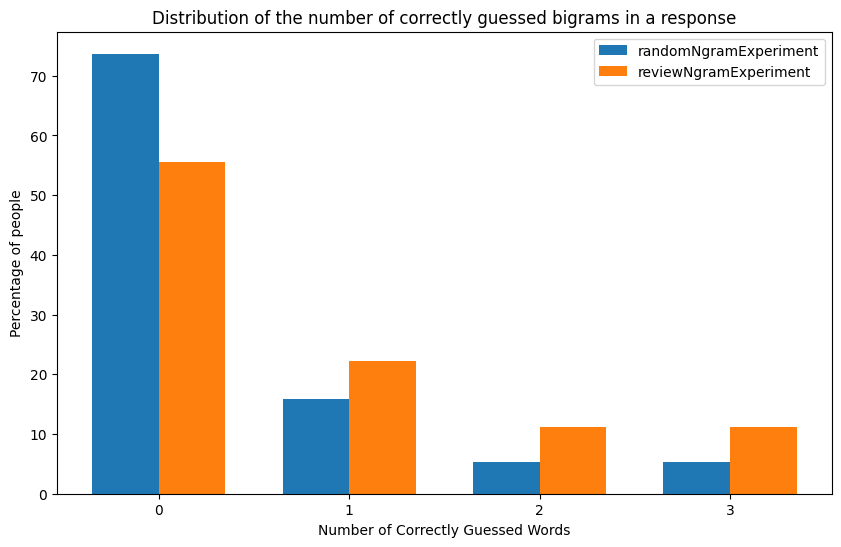

In [ ]:
# Data for randomNgramExperiment bigram
random_ngram_experiment = {
    0: 14,
    1: 3,
    2: 1,
    3: 1
}
# Data for reviewNgramExperiment bigram
review_ngram_experiment = {
    0: 10,
    1: 4,
    2: 2,
    3: 2
}

# Total number of test IDs in each group
total_random = sum(random_ngram_experiment.values())
total_review = sum(review_ngram_experiment.values())

# Calculate percentage for each group
random_percentage = {k: (v / total_random) * 100 for k, v in random_ngram_experiment.items()}
review_percentage = {k: (v / total_review) * 100 for k, v in review_ngram_experiment.items()}

# Plotting
x = np.arange(len(random_percentage))

width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))

bars1 = ax.bar(x - width/2, random_percentage.values(), width, label='randomNgramExperiment')
bars2 = ax.bar(x + width/2, review_percentage.values(), width, label='reviewNgramExperiment')

ax.set_xlabel('Number of Correctly Guessed Words')
ax.set_ylabel('Percentage of people')
ax.set_title('Distribution of the number of correctly guessed bigrams in a response')
ax.set_xticks(x)
ax.set_xticklabels(random_percentage.keys())
ax.legend()

plt.show()


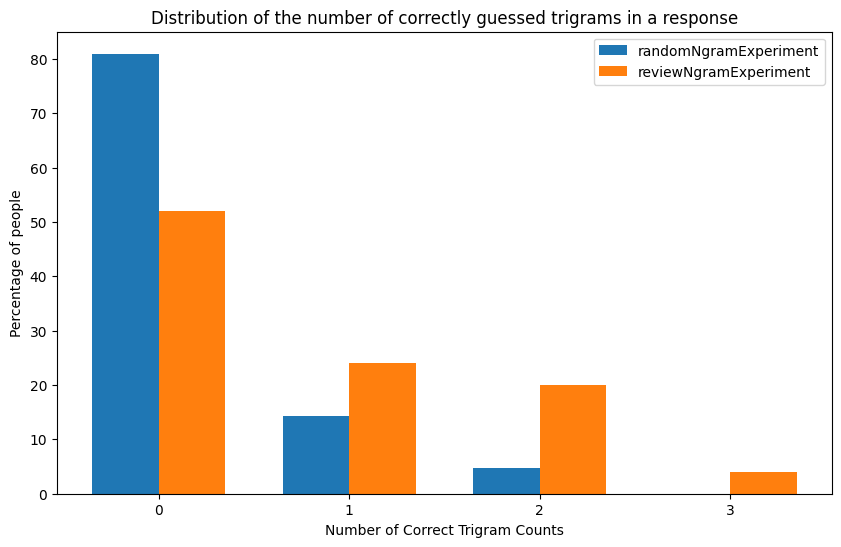

In [ ]:
# Data for randomNgramExperiment trigram
random_ngram_experiment_trigram = {
    0: 17,
    1: 3,
    2: 1,
    3: 0
}

# Data for reviewNgramExperiment trigram
review_ngram_experiment_trigram = {
    0: 13,
    1: 6,
    2: 5,
    3: 1
}

# Total number of test IDs in each group
total_random_trigram = sum(random_ngram_experiment_trigram.values())
total_review_trigram = sum(review_ngram_experiment_trigram.values())

# Calculate percentage for each group
random_percentage_trigram = {k: (v / total_random_trigram) * 100 for k, v in random_ngram_experiment_trigram.items()}
review_percentage_trigram = {k: (v / total_review_trigram) * 100 for k, v in review_ngram_experiment_trigram.items()}

# Plotting
x = np.arange(len(random_percentage_trigram))

width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))

bars1 = ax.bar(x - width/2, random_percentage_trigram.values(), width, label='randomNgramExperiment')
bars2 = ax.bar(x + width/2, review_percentage_trigram.values(), width, label='reviewNgramExperiment')

ax.set_xlabel('Number of Correct Trigram Counts')
ax.set_ylabel('Percentage of people')
ax.set_title('Distribution of the number of correctly guessed trigrams in a response')
ax.set_xticks(x)
ax.set_xticklabels(random_percentage_trigram.keys())
ax.legend()

plt.show()
